In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_15 = pd.read_csv('2015.csv')
df_16 = pd.read_csv('2016.csv')
df_17 = pd.read_csv('2017.csv')
df_18 = pd.read_csv('2018.csv')
df_19 = pd.read_csv('2019.csv')

In [4]:
# Filter rows where 'Column1' is in the range [0.5, 1]
f = df_15[(df_15['Health (Life Expectancy)'] >= 0.5) & (df_15['Health (Life Expectancy)'] <= 1)]

# Print the filtered DataFrame
print(f['Country'])

0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
131      Sri Lanka
133       Bulgaria
134          Egypt
144       Cambodia
155          Syria
Name: Country, Length: 113, dtype: object


In [5]:
t = df_16.sort_values(by='Happiness Score', ascending=False).head(10)

# Print the top 10 countries with the highest Happiness Score for 2016
print(t[['Country', 'Happiness Score']])

       Country  Happiness Score
0      Denmark            7.526
1  Switzerland            7.509
2      Iceland            7.501
3       Norway            7.498
4      Finland            7.413
5       Canada            7.404
6  Netherlands            7.339
7  New Zealand            7.334
8    Australia            7.313
9       Sweden            7.291


In [6]:
# Group the data by 'Region' and calculate the mean Happiness Score for each group
mean = df_16.groupby('Region')['Happiness Score'].mean()

# Print the mean Happiness Score by Region for the specified year
print(mean)

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64


Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual, Standard Error, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Health..Life.Expectancy., Trust..Government.Corruption., Dystopia.Residual, Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Perceptions of corruption]
Index: []

[0 rows x 30 columns]


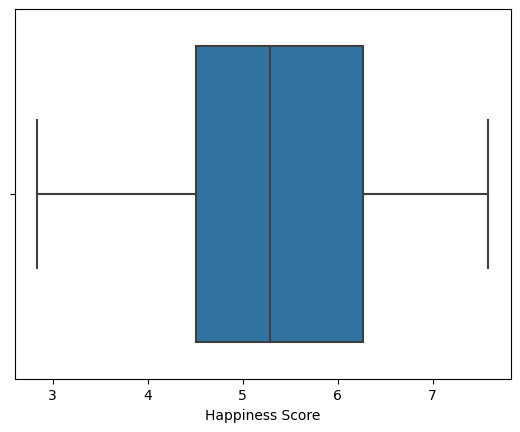

In [8]:
cd = pd.concat([df_16, df_15,df_17,df_18,df_19], ignore_index=True)
#print(cd)
Q1 = cd['Happiness Score'].quantile(0.25)
Q3 = cd['Happiness Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (cd['Happiness Score'] < lower_bound) | (cd['Happiness Score'] > upper_bound)

# List of outliers
od = cd[outliers]
print (od)

# Assuming you have a DataFrame named 'df' with a column of interest
sns.boxplot(x=cd['Happiness Score'])
plt.show()

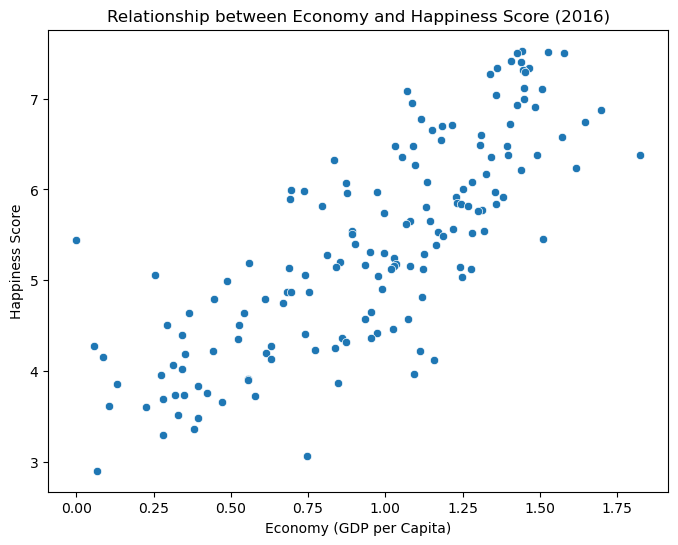

Pearson Correlation Coefficient: 0.7903220167261062


In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df_16)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title(f'Relationship between Economy and Happiness Score ({2016})')
plt.show()

# Calculate the Pearson correlation coefficient
correlation = df_16['Happiness Score'].corr(df_16['Economy (GDP per Capita)'])

print(f"Pearson Correlation Coefficient: {correlation}")